<a href="https://colab.research.google.com/github/Jarvis-X/Swarms-Course-Projects/blob/main/SwarmHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [127]:
K = 20
np.random.seed(int(time.time_ns()%2**20))
mu = np.random.uniform(low=-10, high=10, size=K)
sigma = np.random.uniform(low=0, high=1, size=K)
optimal = np.argmax(mu)
print(optimal)

13


In [110]:
def bandit(mu, sigma, k):
    return np.random.normal(loc=mu[k], scale=sigma[k])

# Epsilon greedy

10% of the explorations are for exploration. In each iteration, a random number between 0 and 1 is given. If the random number is between 0 and 0.1, then the program randomly selects a bandit, extracts the reward, and adds to the total reward. The reward is averaged out with the previously extracted rewards that belong to the bandit, and the average reward is used for the greed.

90% of the explorations are for greed. If the random number is between 0.1 and 1.0, the program selects the bandit which has the highest average reward, and extracts the reward which adds to the total reward.

# Upper-Confidence-Bound

Instead of allocating a certain proportion of operations for exploration, UCB integrates a exploration term in the maximization objective function in addition to its avergae reward. This term increases as the number of operations where a bandit is not selected increases, and decreases as the number of operations where a bandit is selected decreases. Such proporty makes the program revisit the less visited bandits even if it used to give slow rewards. I initialized the uncertainties at maximum to make sure all bandits deserve a visit at least.

# Visualization

The first plot shows the total reward comparison between the three policies across all trials.

The second plot shows the change of total reward of the poliocies in one trial.

The third plot shows the optimal rate of the policies in one trial.

# Epsilon-greedy V.S UCB

Through tweaking the mu and sigma in the second cell, I figure out UCB works extra well when the uncertainty is high. Even if the rate of selecting the bandit with the maximum mean value is not significantly higher than that of ϵ-greedy, UCB can still get a higher total reward because of the frequent revisit to the more uncertain bandits. When the variation is high, such revisit often blurs the boundary of rewards between bandits with close mean, which is uncaptured by the ϵ-greedy method.

base case: -5266.287941306442
epsilon:  36757.44838400028
upper-confidence-bound:  45236.85911310609
base case: -5038.725106014667
epsilon:  37008.38906026303
upper-confidence-bound:  45867.62801754233
base case: -5984.838395484015
epsilon:  37276.1677767929
upper-confidence-bound:  44907.46540316738
base case: -5328.8639277315315
epsilon:  37459.007992649975
upper-confidence-bound:  45212.40387708022
base case: -4553.060218193761
epsilon:  36964.948266259125
upper-confidence-bound:  45465.16904508121


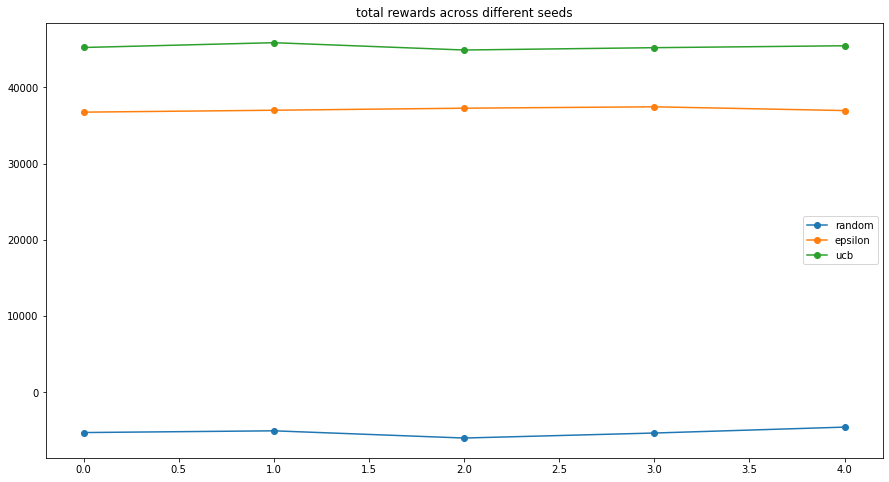

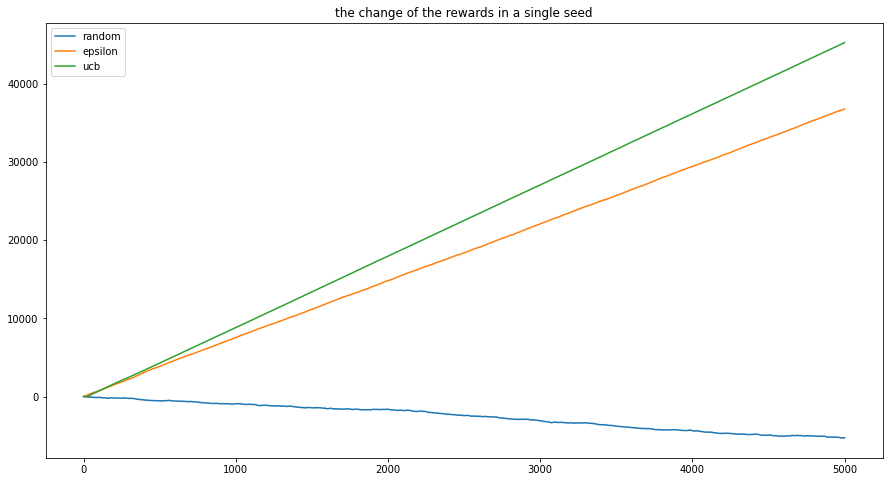

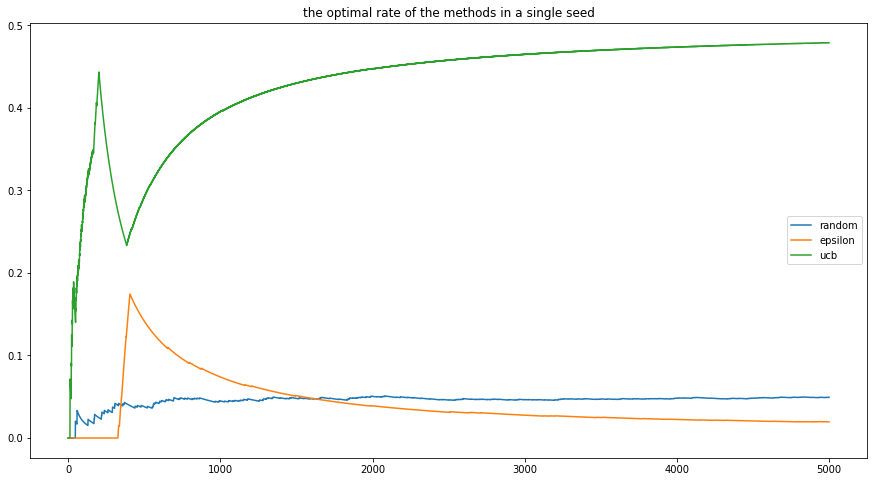

In [128]:
T = 5000
num_trials = 5

seeds = [int(time.time_ns()%2**24) for _ in range(num_trials)]
randoms = []
epsilons = []
upper_conf = []

random_reward_history = []
epsilon_reward_history = []
upper_conf_reward_history = []

random_optimal_rate = []
epsilon_optimal_rate = []
upper_conf_optimal_rate = []

for seed in seeds:
    np.random.seed(seed)

    # base case: random exploration
    r = 0
    count = 0
    optimal_count = 0
    for i in range(T):
        count += 1
        k = np.random.choice(list(range(K)))
        if k == optimal:
            optimal_count += 1
        
        random_optimal_rate.append(optimal_count/count)
        val = bandit(mu, sigma, k)
        # print(val)
        r += val
        random_reward_history.append(r)

    print("base case:", r)
    randoms.append(r)

    # epsilon-greedy
    epsilon = 0.1
    total_reward = 0
    reward_choices = np.array([0] * K, dtype=np.int32)
    reward = np.array([1] * K)
    count = 0
    optimal_count = 0
    for i in range(T):
        count += 1
        # random number between 0 and 1
        rn = np.random.rand()
        if rn < epsilon:
            # if the random number is less than the epsilon, we explore
            k = np.random.choice(list(range(K)))
        else:
            # otherwise, we go greedy
            k = np.argmax(reward)
        if k == optimal:
            optimal_count += 1
        val = bandit(mu, sigma, k)
        total_reward += val
        reward_choices[k] += 1
        reward[k] = reward[k] + (val - reward[k])/reward_choices[k]
        epsilon_optimal_rate.append(optimal_count/count)
        epsilon_reward_history.append(total_reward)

    print("epsilon: ", total_reward)
    epsilons.append(total_reward)

    # Upper-Confidence-Bound
    c = 2
    total_reward = 0
    reward_choices = np.zeros(K, dtype=np.int32)
    reward = np.array([1] * K)
    count = 0
    optimal_count = 0
    for i in range(T):
        count += 1
        uncertainty = np.zeros(K)
        for sel in range(K):
            if reward_choices[sel] == 0:
                uncertainty[sel] = np.iinfo(np.int32).max
            else:
                # the square-root term that measures the uncertainty of the 
                # estimation of all possible bandit solutions
                uncertainty[sel] = np.sqrt(np.log(i+1)/reward_choices[sel])

        k = np.argmax(reward + c*uncertainty)

        if k == optimal:
            optimal_count += 1
        
        val = bandit(mu, sigma, k)
        total_reward += val
        reward_choices[k] += 1
        reward[k] = reward[k] + (val - reward[k])/reward_choices[k]

        upper_conf_optimal_rate.append(optimal_count/count)
        upper_conf_reward_history.append(total_reward)

    print("upper-confidence-bound: ", total_reward)
    upper_conf.append(total_reward)

fig = plt.figure(figsize=(15, 8))
plt.plot(randoms, "o-", label="random")
plt.plot(epsilons, "o-",label="epsilon")
plt.plot(upper_conf, "o-",label="ucb")
plt.title("total rewards across different seeds")
plt.legend()

fig = plt.figure(figsize=(15, 8))
plt.plot(random_reward_history[:T], "-", label="random")
plt.plot(epsilon_reward_history[:T], "-",label="epsilon")
plt.plot(upper_conf_reward_history[:T], "-",label="ucb")
plt.title("the change of the rewards in a single seed")
plt.legend()

fig = plt.figure(figsize=(15, 8))
plt.plot(random_optimal_rate[:T], "-", label="random")
plt.plot(epsilon_optimal_rate[:T], "-",label="epsilon")
plt.plot(upper_conf_optimal_rate[:T], "-",label="ucb")
plt.title("the optimal rate of the methods in a single seed")
plt.legend()